In [6]:
import numpy as np
import scipy.sparse.linalg as spla
import sympy as sp
import matplotlib.pyplot as plt


Rozklad radu y'=ky
y' = ky(1-ay)

Analytical solution: Eq(x(t), 1/(a*(1 + (-a*x0 + 1)*exp(-k*t)/(a*x0))))


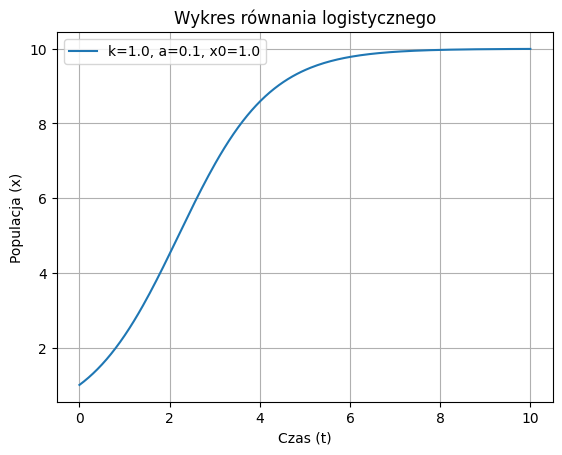

In [ ]:
t = sp.symbols('t')
x = sp.Function('x')
k, a, x0 = sp.symbols('k a x0')
eq_log = sp.Eq(sp.Derivative(x(t), t), k*x(t)*(1 - a*x(t)))
res_log = sp.dsolve(eq_log, ics={x(0): x0})
print('Analytical solution:', res_log)

x_rhs_num = sp.lambdify((t, k, a, x0), res_log.rhs, 'numpy')

fig, ax = plt.subplots()
t_vals = np.linspace(0, 10, 200)
x_vals = x_rhs_num(t_vals, 1.0, 0.1, 1.0)
ax.plot(t_vals, x_vals, label='k=1.0, a=0.1, x0=1.0')
ax.set_xlabel('Czas (t)')
ax.set_ylabel('Populacja (x)')
ax.set_title('Wykres równania logistycznego')
ax.grid(True)
ax.legend()
plt.show()

Analytical solution: Eq(x(t), 1/(a*(1 + (-a*x0 + 1)*exp(-k*t)/(a*x0))))


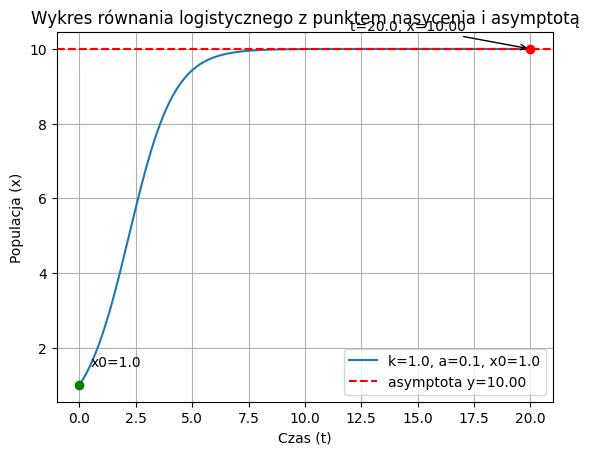

In [12]:
# (duplikat) Definicja symboli i rozwiązanie analityczne — ta komórka robi to samo co poprzednia
t = sp.symbols('t')
x = sp.Function('x')
k, a, x0 = sp.symbols('k a x0')
eq_log = sp.Eq(sp.Derivative(x(t), t), k*x(t)*(1 - a*x(t)))
res_log = sp.dsolve(eq_log, ics={x(0): x0})
print('Analytical solution:', res_log)

x_rhs_num = sp.lambdify((t, k, a, x0), res_log.rhs, 'numpy')

# Parametry i punkt nasycenia
k_val = 1.0
a_val = 0.1
x0_val = 1.0
saturation = 1.0 / a_val

fig, ax = plt.subplots()
t_vals = np.linspace(0, 20, 400)
x_vals = x_rhs_num(t_vals, k_val, a_val, x0_val)
ax.plot(t_vals, x_vals, label=f'k={k_val}, a={a_val}, x0={x0_val}')
ax.axhline(saturation, color='red', linestyle='--', label=f'asymptota y={saturation:.2f}')
t_end = t_vals[-1]
x_end = x_vals[-1]
ax.plot(t_end, x_end, 'o', color='red')
ax.annotate(f't={t_end:.1f}, x={x_end:.2f}', xy=(t_end, x_end), xytext=(t_end*0.6, saturation+0.5),
            arrowprops=dict(arrowstyle='->'))
ax.plot(0, x0_val, 'o', color='green')
ax.annotate(f'x0={x0_val}', xy=(0, x0_val), xytext=(0.5, x0_val+0.5))
ax.set_xlabel('Czas (t)')
ax.set_ylabel('Populacja (x)')
ax.set_title('Wykres równania logistycznego z punktem nasycenia i asymptotą')
ax.grid(True)
ax.legend()
plt.show()

In [13]:
# Obliczenie granicy dla wyrażenia:\
# (x*e^{kt}) / (a*x*(e^{kt}-1) + 1) jako t -> +oo przy użyciu sympy
t, k, a, x = sp.symbols('t k a x')
expr = x*sp.exp(k*t)/(a*x*(sp.exp(k*t)-1) + 1)
# Dzielimy licznik i mianownik przez e^{k t}, co ułatwia obliczenie granicy:
expr_div = sp.simplify(x/(a*x*(1 - sp.exp(-k*t)) + sp.exp(-k*t)))
lim_t_inf = sp.limit(expr_div, t, sp.oo)
print('Limit t->+oo (symbolicznie):', lim_t_inf)
# Dla kompletności: granica t->-oo
lim_t_minus = sp.limit(expr_div, t, -sp.oo)
print('Limit t->-oo (symbolicznie):', lim_t_minus)
# Przykład numeryczny (k>0, a>0, x>0) — powinno dać 1/a:
example = expr.subs({k:1, a:0.1, x:1})
print('Przykład (k=1, a=0.1, x=1) limit t->+oo =', sp.limit(example, t, sp.oo))

NotImplementedError: Result depends on the sign of sign(k)

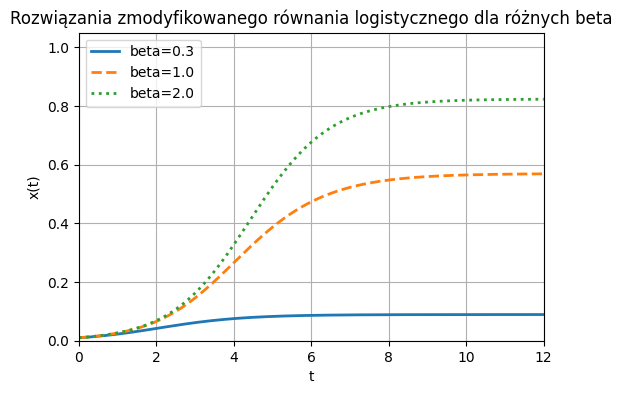

In [8]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def p_of_x(x, alpha, beta):
    return (alpha * x**2 )/ (beta**2 + x**2)

def model(t, x, k, b, alpha, beta):
    _ = t  # use t to avoid 't is not accessed' linter warning
    return k * x * (1 - (x / b)) - p_of_x(x, alpha, beta)

# Parametry (dostosuj zgodnie z książką)
k = 1.0
b = 1.0  # w książce b odpowiada pojemności, możemy ustawić b=1 po skalowaniu
alpha = 1.0
betas = [0.3, 1.0, 2.0]  # wartości beta: solid, dashed, dotted
t_span = (0.0, 12.0)
t_eval = np.linspace(t_span[0], t_span[1], 400)
x0 = [0.01]  # mała wartość początkowa (jak w książce wykres zaczyna się blisko 0)

fig, ax = plt.subplots(figsize=(6,4))
styles = ['-', '--', ':']
for beta, style in zip(betas, styles):
    sol = solve_ivp(model, t_span, x0, t_eval=t_eval, args=(k, b, alpha, beta), vectorized=False, rtol=1e-6)
    ax.plot(sol.t, sol.y[0], style, linewidth=2, label=f'beta={beta}')

ax.set_xlim(t_span)
ax.set_ylim(0, 1.05)
ax.set_xlabel('t')
ax.set_ylabel('x(t)')
ax.set_title('Rozwiązania zmodyfikowanego równania logistycznego dla różnych beta')
ax.legend()
ax.grid(True)
plt.show()
